In [267]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from scipy.special import kv, gamma

from sklearn.metrics import root_mean_squared_error

Matérn para $\nu=n+\frac{1}{2}$

In [ ]:
import math 

aux = lambda t,n,x,k : math.factorial(n+k) / math.factorial(2*n) * math.comb(n,k) * (2*t*x)**(n-k)

matern_model = lambda t, n, x: np.exp(-t*x) * np.sum([aux(t,n,x,k) for k in range(0,n+1)])

n = 1 # nu = n + 1/2
theta = 10

matern = np.vectorize(lambda x : matern_model(theta, n, x))

Intento con $K_\nu$

In [268]:
matern_model = lambda t, nu, x: 2**(1-nu) / gamma(nu) * (t*x)**nu * kv(nu, t*x) if kv(nu, t*x) != np.inf else 1

nu = 7/2
theta = 50/n

matern = np.vectorize(lambda x : matern_model(theta, nu, x))

Matérn con $\nu=\frac{3}{2}$

In [ ]:
matern_model = lambda t, x: (1 + t * x) * np.exp(- t * x) # nu=3/2

theta = 5/n

matern = np.vectorize(lambda x : matern_model(theta, x))

Simulemos

In [269]:
n = 500
X = np.random.uniform(0, n, (n,2))

In [270]:
sigma = matern(cdist(X,X) + np.eye(n))

np.fill_diagonal(sigma, 1)

In [271]:
Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, n)

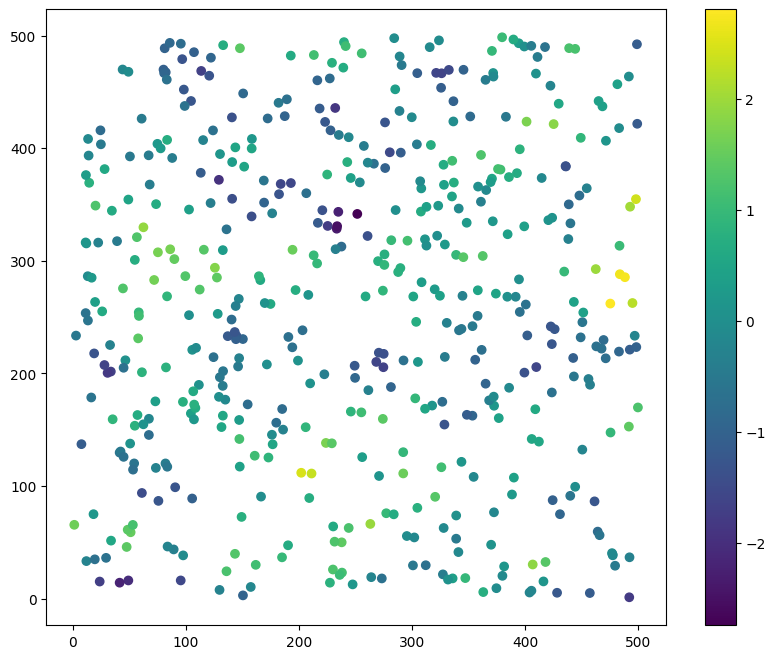

In [272]:
plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], c=Y)
plt.colorbar();

Kriging simple

In [273]:
def kriging(x, X, Y, sigma):
    '''
    x : prediction point
    X : the vector of observation points
    Y : observations
    sigma : covariance matrix of observations
    '''
    return matern(cdist(x, X)) @ np.linalg.solve(sigma, Y)

Leave-one-out

In [274]:
Y_pred = []
for i in range(0,n):
    sigma_aux = np.delete(np.delete(sigma, i, axis=0), i, axis=1)

    X_aux = np.delete(X, i, axis=0)
    Y_aux = np.delete(Y, i, axis=0)
    
    Y_pred.append(kriging(X[[i]], X_aux, Y_aux, sigma_aux))

Y_pred = np.array(Y_pred)

In [275]:
root_mean_squared_error(Y, Y_pred)

0.2908932306512866

''

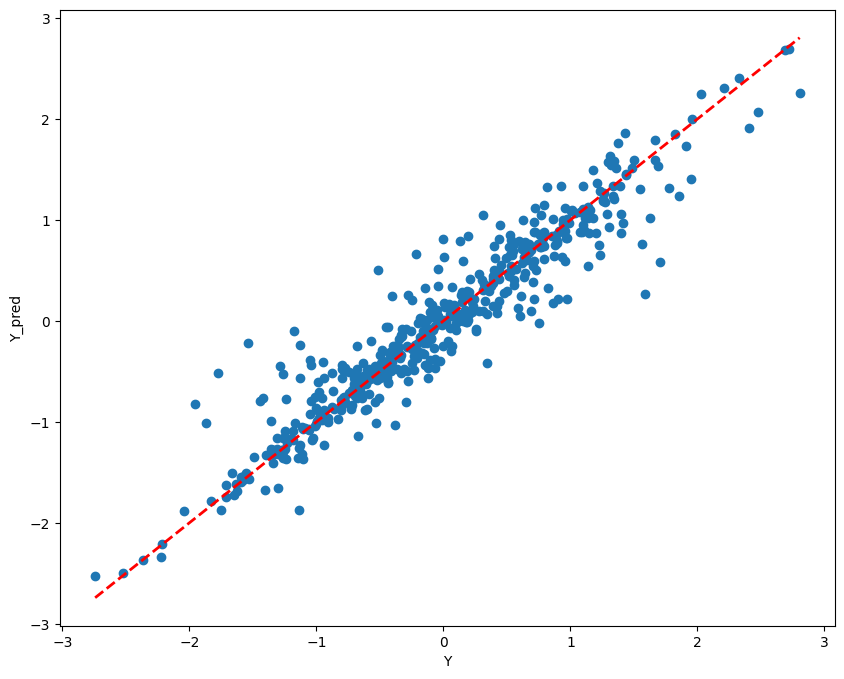

In [277]:
plt.figure(figsize=(10,8))

plt.scatter(Y, Y_pred)
plt.plot([np.min(Y), np.max(Y)], [np.min(Y), np.max(Y)], ls = '--', lw = 2, c = 'r')
plt.xlabel('Y')
plt.ylabel('Y_pred');